In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df_wcv = pd.read_csv(r"/Users/user/Desktop/Master_thesis/data/DFOCRP_H50bjRcb-WCV1.csv")
df_nml = pd.read_csv(r"/Users/user/Desktop/Master_thesis/data/DFOCRP_KkHK0R2F-NML1.csv")

/var/folders/z0/r0qqn5l95fbfshftv56xpccc0000gn/T/ipykernel_1850/2467461284.py:1: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wcv = pd.read_csv(r"/Users/user/Desktop/Master_thesis/data/DFOCRP_H50bjRcb-WCV1.csv")


In [104]:
df_wcv.head()

,Deploy.ID,Loc.ID,CRP_UID,PG.Id,UTC,UTCMilliseconds,Year,Month,Day,Hour,Minute,Second,detectionType,Sound.ID.Species,KW.Type,Clan,Subclan,Pod,Call.Type,Comments,duration.samp,Fs.Hz,duration.sec,lowFreq,highFreq,UTC.recording.start.time
0,H50bjRcb,WCV1,679,757.0,2011-05-19 00:33:08,343,2011,5,19,0,33,8,False Positive,Vessel Noise,NaN,NaN,NaN,NaN,NaN,NaN,4608,16384,0.281250,1856,2048,2011-05-19 00:30:00
1,H50bjRcb,WCV1,680,759.0,2011-05-19 01:18:10,718,2011,5,19,1,18,10,False Positive,Vessel Noise,NaN,NaN,NaN,NaN,NaN,NaN,4352,16384,0.265625,2816,3040,2011-05-19 01:15:00
2,H50bjRcb,WCV1,681,763.0,2011-05-19 04:00:02,781,2011,5,19,4,0,2,False Positive,Vessel Noise,NaN,NaN,NaN,NaN,NaN,NaN,4864,16384,0.296875,1696,1824,2011-05-19 04:00:00
3,H50bjRcb,WCV1,682,764.0,2011-05-19 04:03:13,217,2011,5,19,4,3,13,False Positive,Vessel Noise,NaN,NaN,NaN,NaN,NaN,NaN,6912,16384,0.421875,2560,2720,2011-05-19 04:00:00
4,H50bjRcb,WCV1,683,765.0,2011-05-19 04:15:00,999,2011,5,19,4,15,0,False Positive,Vessel Noise,NaN,NaN,NaN,NaN,NaN,NaN,5120,16384,0.312500,2464,2624,2011-05-19 04:15:00


In [105]:
df_nml.columns

Index(['Deploy.ID', 'Loc.ID', 'CRP_UID', 'PG.Id', 'UTC', 'UTCMilliseconds',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'detectionType',
       'Sound.ID.Species', 'KW.Type', 'Clan', 'Subclan', 'Pod', 'Call.Type',
       'Comments', 'duration.samp', 'Fs.Hz', 'duration.sec', 'lowFreq',
       'highFreq', 'UTC.recording.start.time'],
      dtype='object')

In [106]:
df_nml.tail()

,Deploy.ID,Loc.ID,CRP_UID,PG.Id,UTC,UTCMilliseconds,Year,Month,Day,Hour,Minute,Second,detectionType,Sound.ID.Species,KW.Type,Clan,Subclan,Pod,Call.Type,Comments,duration.samp,Fs.Hz,duration.sec,lowFreq,highFreq,UTC.recording.start.time
108662,KkHK0R2F,NML1,108663,366,2014-02-04 00:09:31,288,2014,2,4,0,9,31,FALSE,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,4608,16000,0.288,5968.75,6093.75,2014-02-04 00:09:31
108663,KkHK0R2F,NML1,108664,367,2014-02-04 00:09:31,351,2014,2,4,0,9,31,FALSE,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,5120,16000,0.320,5656.25,5750.00,2014-02-04 00:09:31
108664,KkHK0R2F,NML1,108665,368,2014-02-04 00:24:31,255,2014,2,4,0,24,31,FALSE,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,4096,16000,0.256,2937.50,3062.50,2014-02-04 00:24:31
108665,KkHK0R2F,NML1,108666,369,2014-02-04 00:39:31,543,2014,2,4,0,39,31,FALSE,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,4864,16000,0.304,5593.75,5750.00,2014-02-04 00:39:31
108666,KkHK0R2F,NML1,108667,370,2014-02-04 00:54:31,351,2014,2,4,0,54,31,FALSE,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,4608,16000,0.288,3968.75,4093.75,2014-02-04 00:54:31


In [107]:
df_wcv["UTC"] = pd.to_datetime(df_wcv["UTC"])
df_nml["UTC"] = pd.to_datetime(df_nml["UTC"])

In [108]:
df_wcv["Month_Year"] = df_wcv["UTC"].dt.to_period("M")
df_nml["Month_Year"] = df_nml["UTC"].dt.to_period("M")

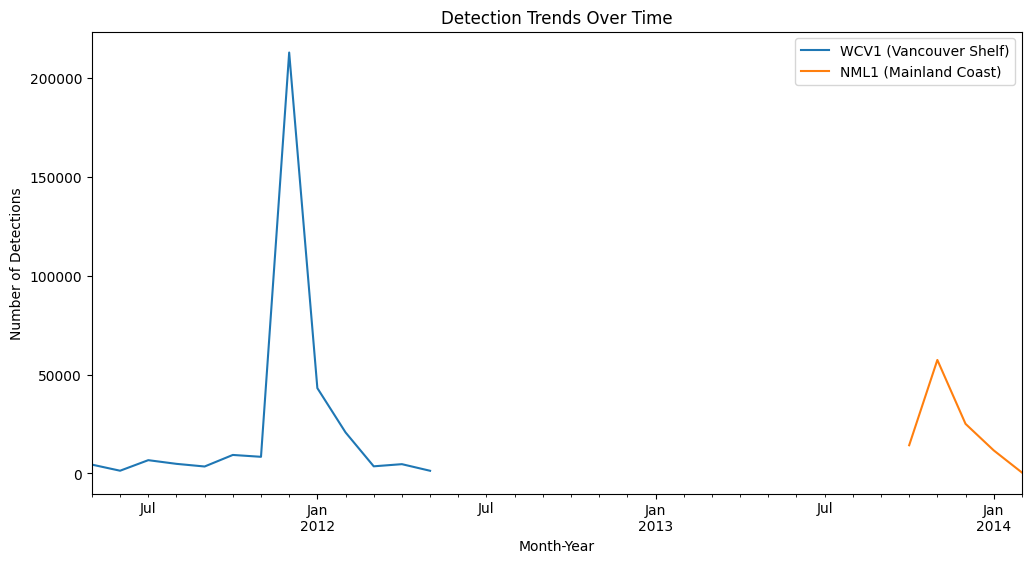

In [109]:
plt.figure(figsize=(12, 6))
df_wcv["Month_Year"].value_counts().sort_index().plot(label="WCV1 (Vancouver Shelf)")
df_nml["Month_Year"].value_counts().sort_index().plot(label="NML1 (Mainland Coast)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Detections")
plt.title("Detection Trends Over Time")
plt.legend()
plt.show()

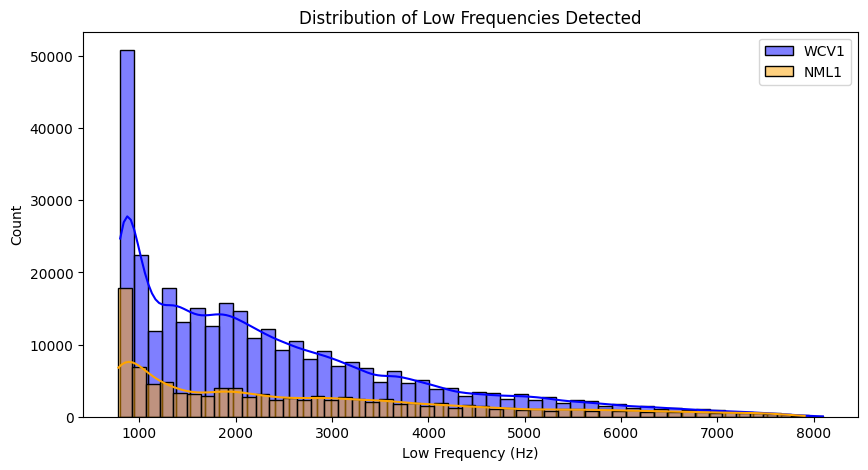

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(df_wcv["lowFreq"], bins=50, color="blue", label="WCV1", kde=True)
sns.histplot(df_nml["lowFreq"], bins=50, color="orange", label="NML1", kde=True)
plt.xlabel("Low Frequency (Hz)")
plt.ylabel("Count")
plt.title("Distribution of Low Frequencies Detected")
plt.legend()
plt.show()

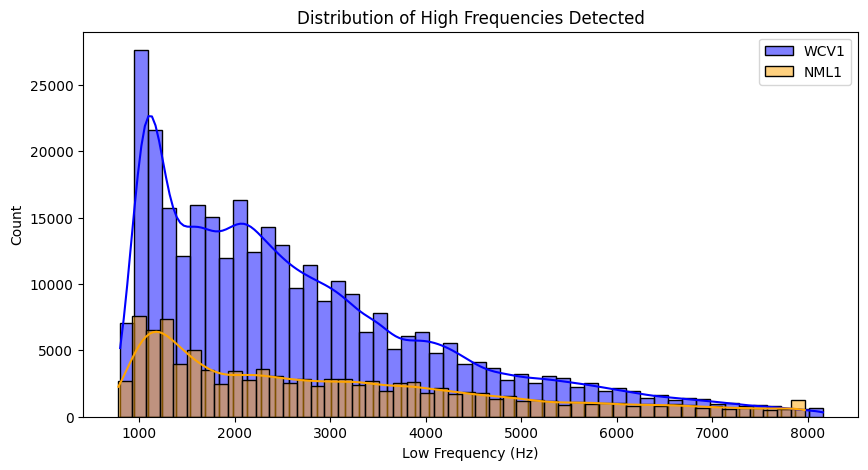

In [111]:
plt.figure(figsize=(10, 5))
sns.histplot(df_wcv["highFreq"], bins=50, color="blue", label="WCV1", kde=True)
sns.histplot(df_nml["highFreq"], bins=50, color="orange", label="NML1", kde=True)
plt.xlabel("Low Frequency (Hz)")
plt.ylabel("Count")
plt.title("Distribution of High Frequencies Detected")
plt.legend()
plt.show()

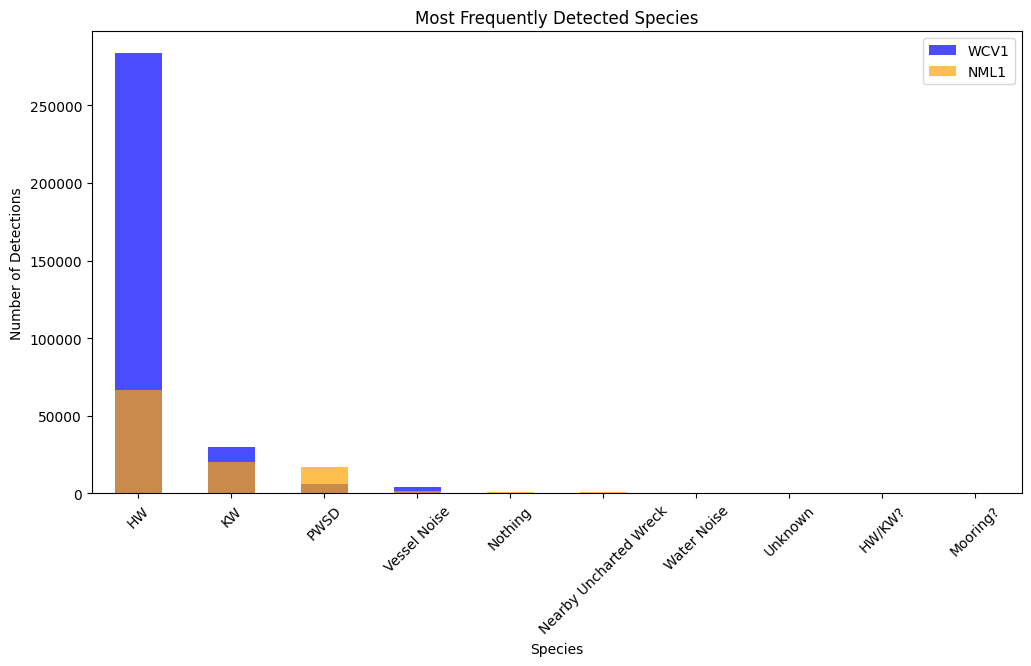

In [112]:
plt.figure(figsize=(12, 6))
df_wcv["Sound.ID.Species"].value_counts().head(10).plot(
    kind="bar", color="blue", alpha=0.7, label="WCV1"
)
df_nml["Sound.ID.Species"].value_counts().head(10).plot(
    kind="bar", color="orange", alpha=0.7, label="NML1"
)
plt.xlabel("Species")
plt.ylabel("Number of Detections")
plt.title("Most Frequently Detected Species")
plt.xticks(rotation=45)
plt.legend()
plt.show()

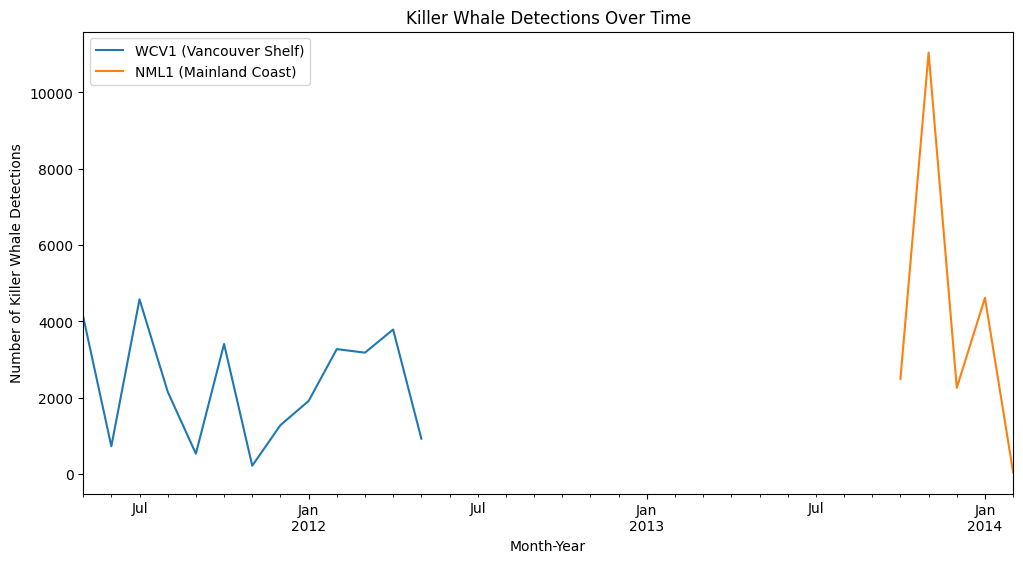

In [113]:
kw_wcv1 = df_wcv[df_wcv["Sound.ID.Species"] == "KW"]
kw_nml1 = df_nml[df_nml["Sound.ID.Species"] == "KW"]

plt.figure(figsize=(12, 6))
kw_wcv1["Month_Year"].value_counts().sort_index().plot(label="WCV1 (Vancouver Shelf)")
kw_nml1["Month_Year"].value_counts().sort_index().plot(label="NML1 (Mainland Coast)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Killer Whale Detections")
plt.title("Killer Whale Detections Over Time")
plt.legend()
plt.show()

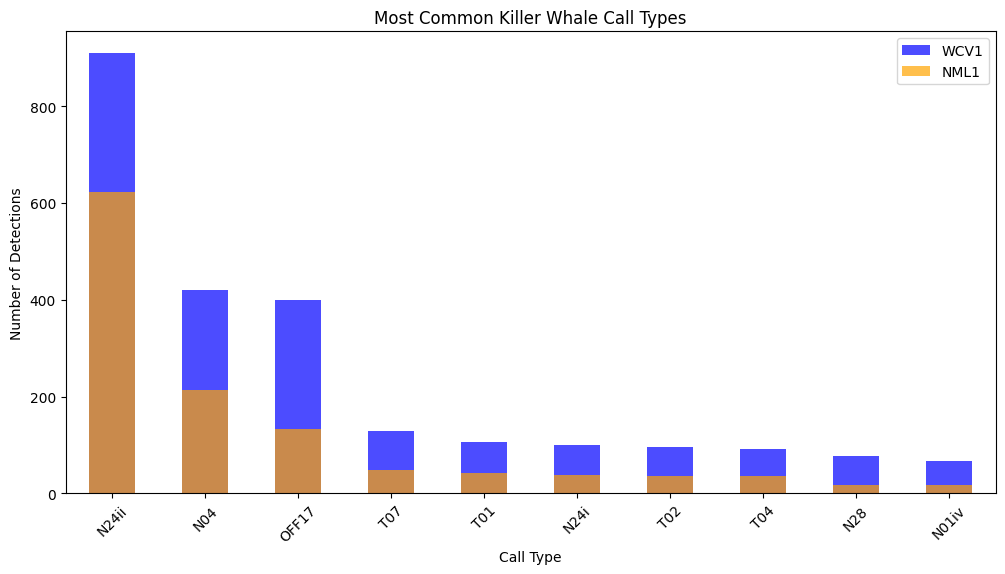

In [114]:
plt.figure(figsize=(12, 6))
kw_wcv1["Call.Type"].value_counts().head(10).plot(
    kind="bar", color="blue", alpha=0.7, label="WCV1"
)
kw_nml1["Call.Type"].value_counts().head(10).plot(
    kind="bar", color="orange", alpha=0.7, label="NML1"
)
plt.xlabel("Call Type")
plt.ylabel("Number of Detections")
plt.title("Most Common Killer Whale Call Types")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [115]:
df_wcv["TimeBin"] = df_wcv["UTC"].dt.floor("min")
df_nml["TimeBin"] = df_nml["UTC"].dt.floor("min")

In [116]:
from itertools import combinations
import numpy as np


# Function to build a co-occurrence matrix
def build_cooccurrence_matrix(df):
    # Group by time bin and aggregate species detections
    grouped = df.groupby("TimeBin")["Sound.ID.Species"].apply(list)

    # Create an empty matrix
    species = df["Sound.ID.Species"].unique()
    matrix = pd.DataFrame(0, index=species, columns=species)

    # Count co-occurrences
    for species_list in grouped:
        for s1, s2 in combinations(set(species_list), 2):  # Unique pairs
            matrix.loc[s1, s2] += 1
            matrix.loc[s2, s1] += 1

    return matrix


# Build co-occurrence matrices for both datasets
co_matrix_wcv1 = build_cooccurrence_matrix(df_wcv)
co_matrix_nml1 = build_cooccurrence_matrix(df_nml)

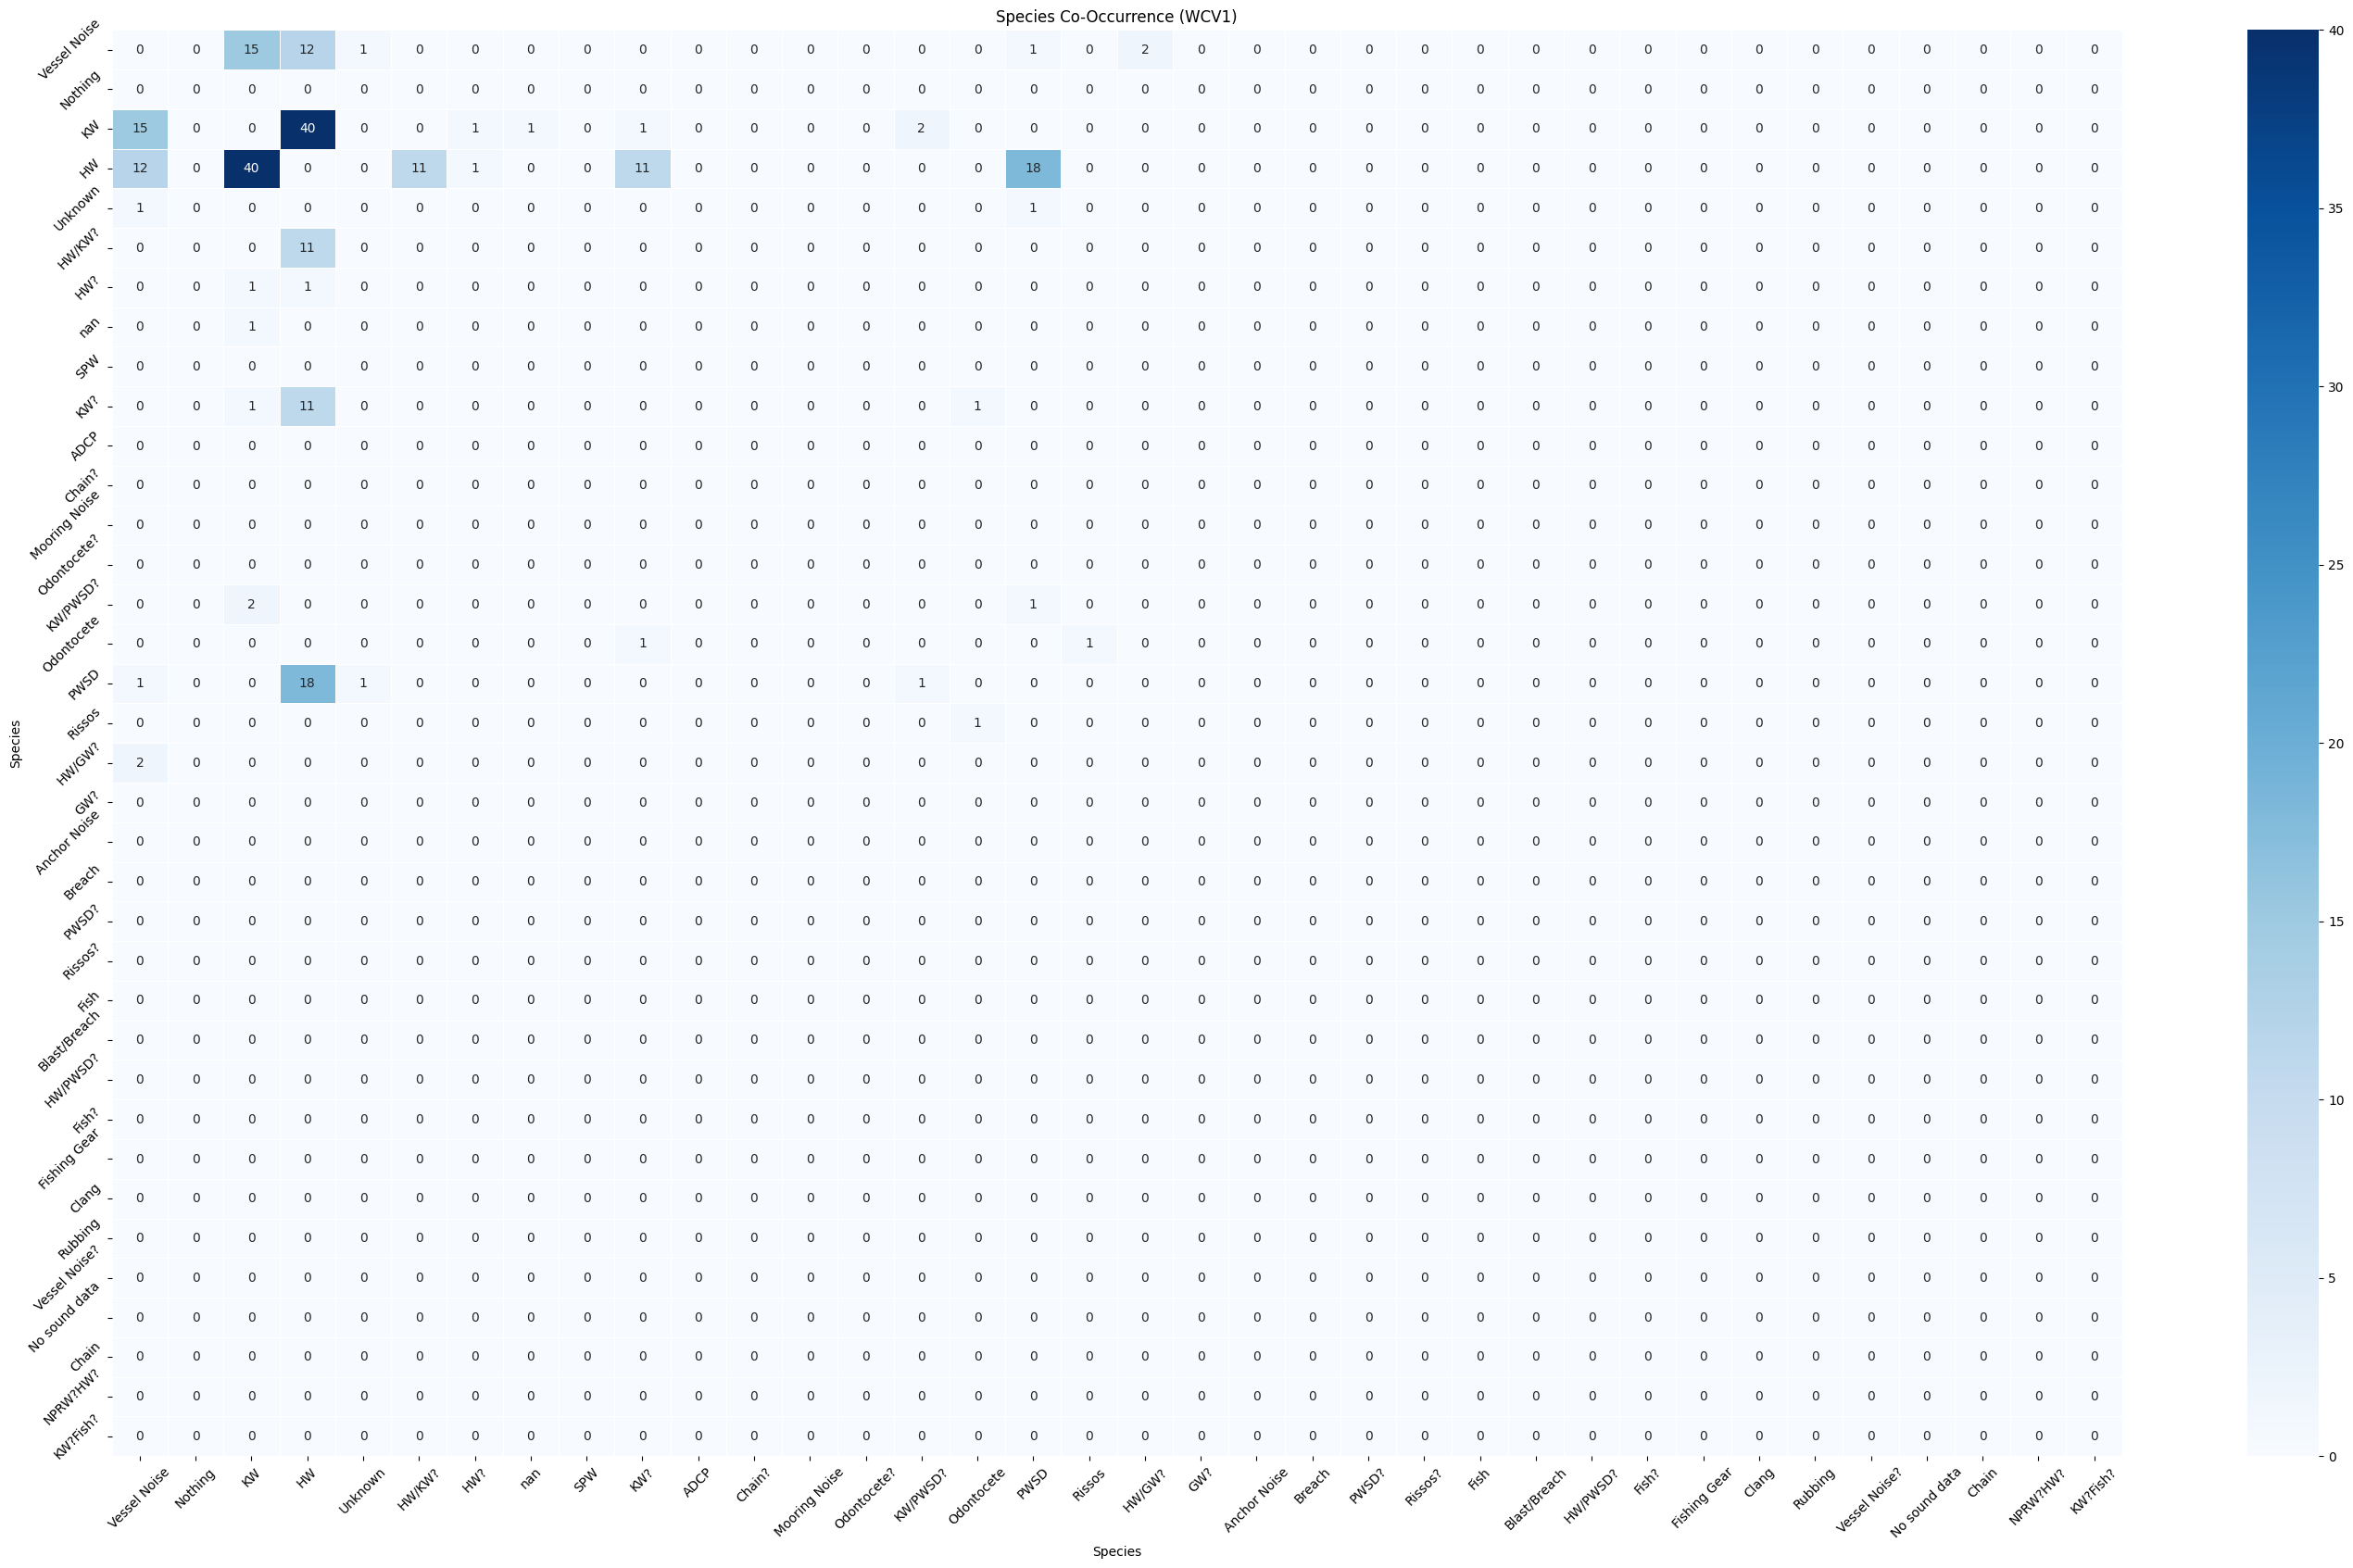

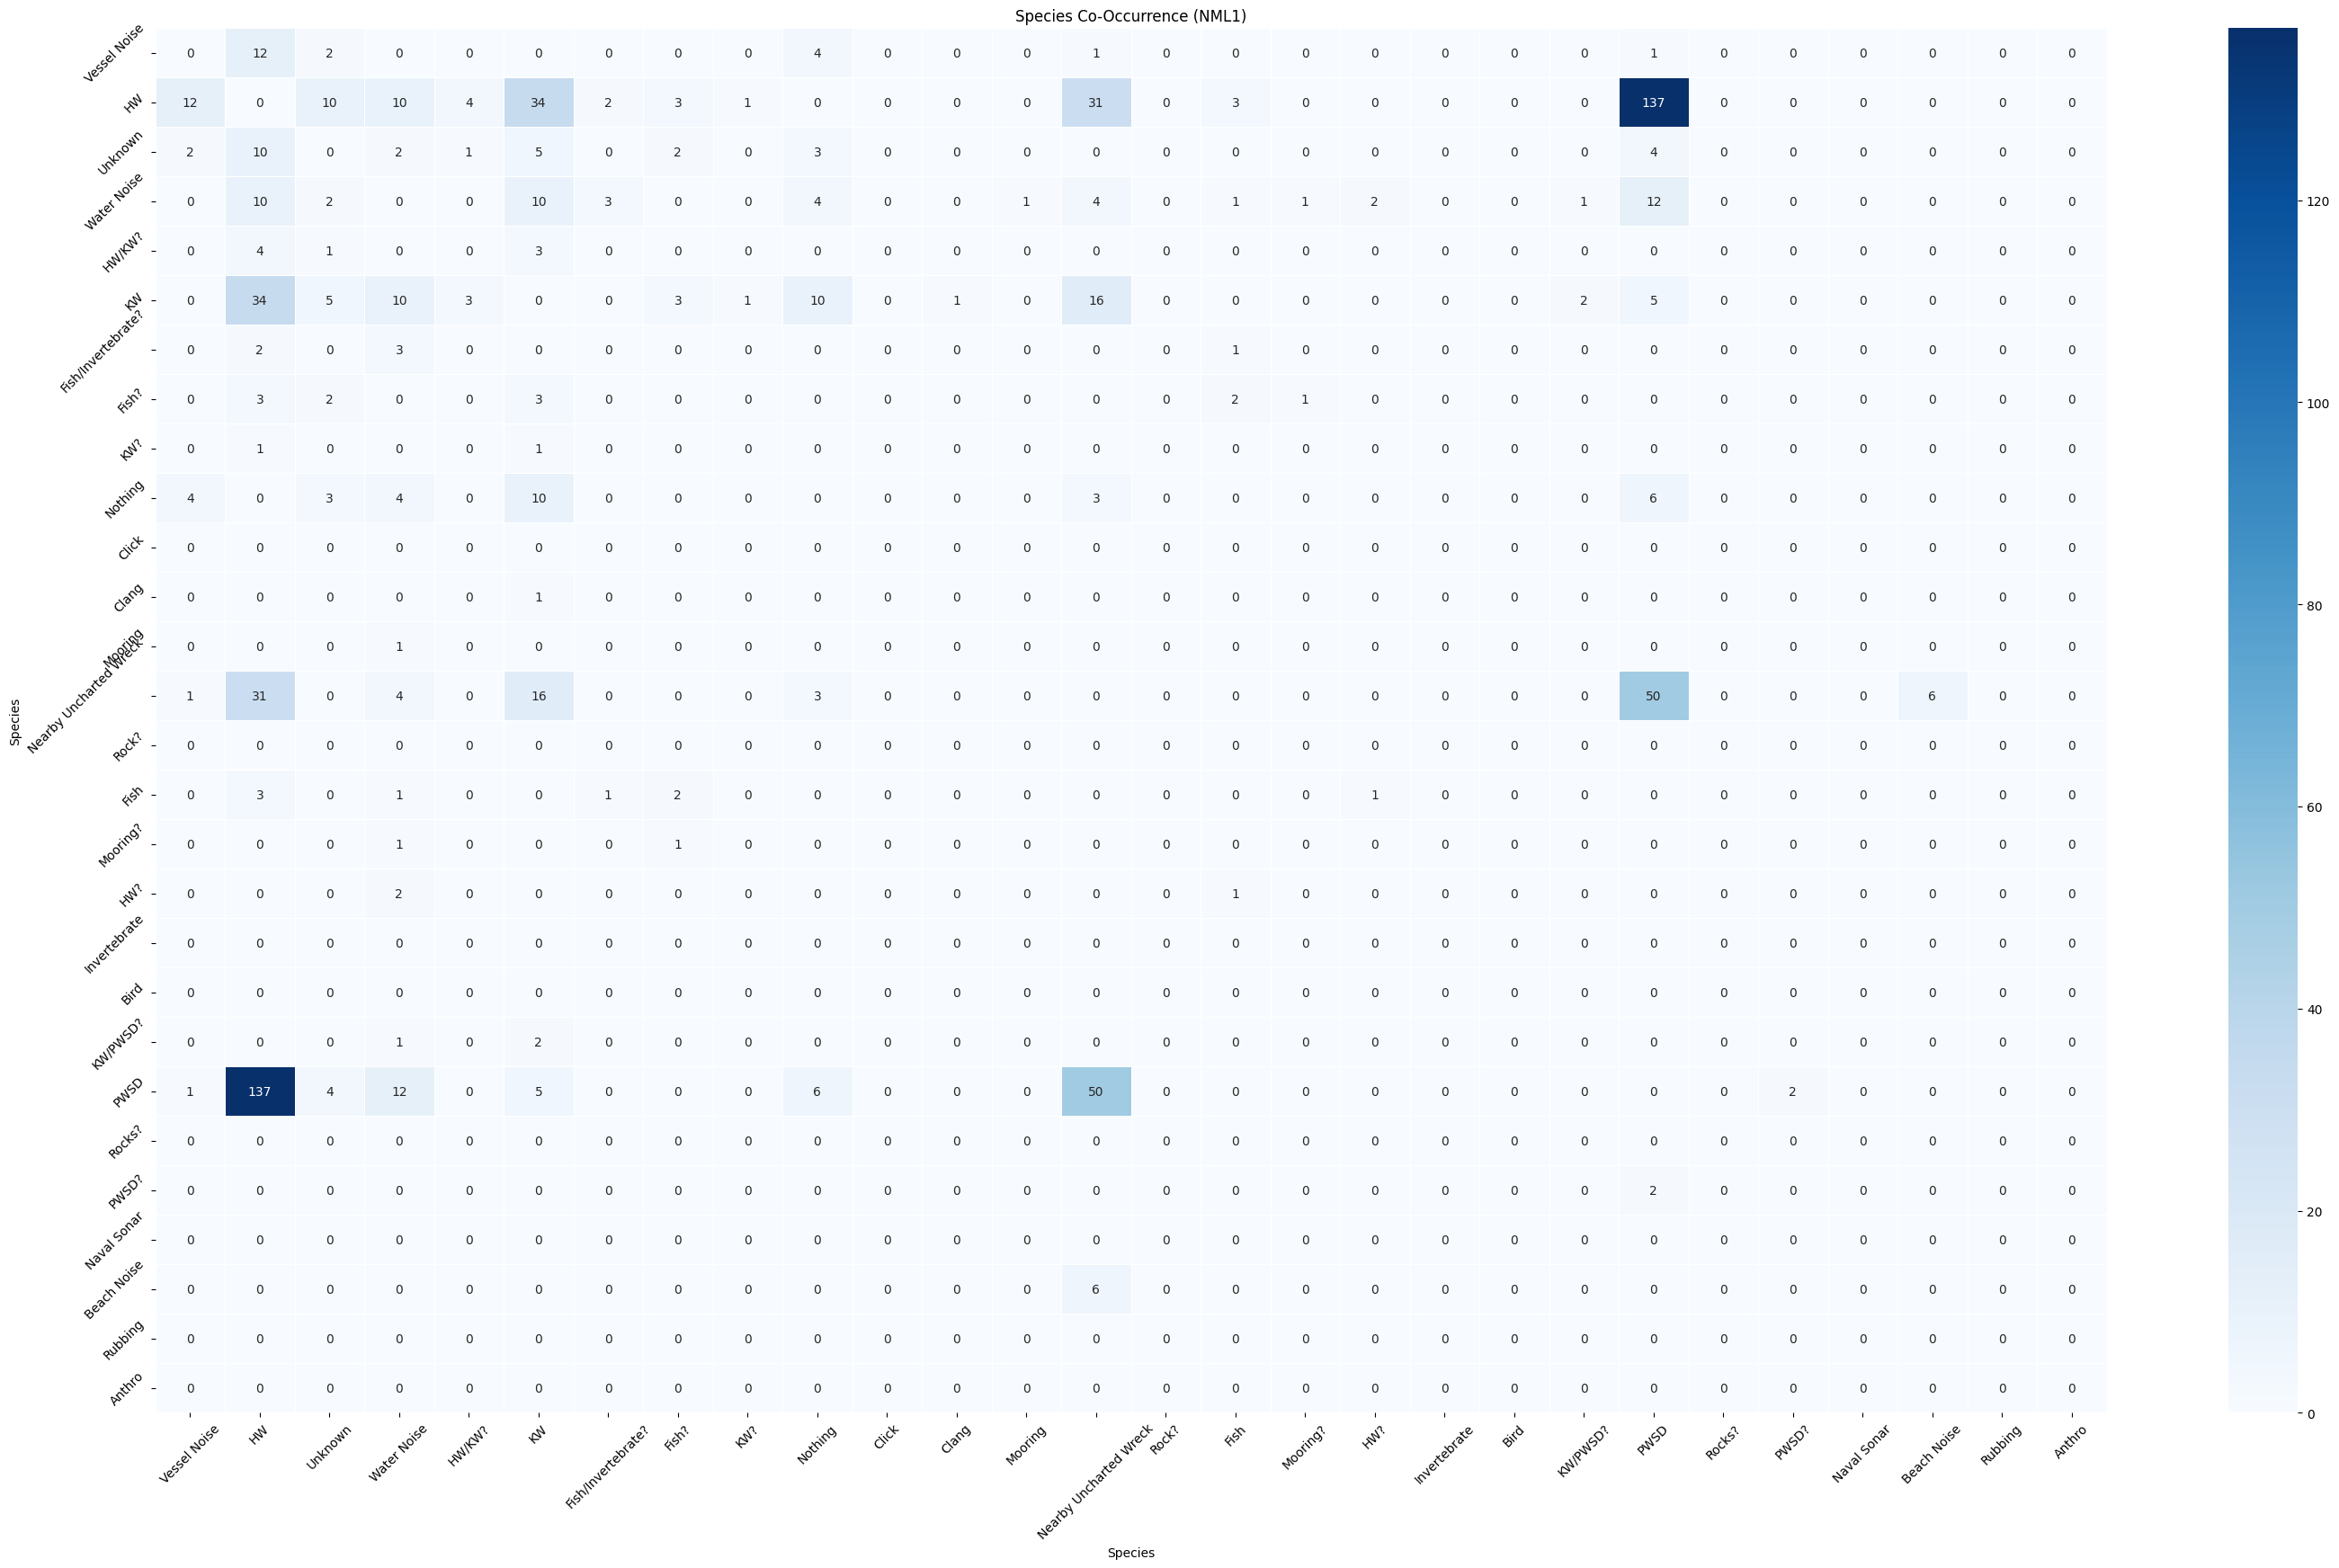

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function to plot heatmap
def plot_cooccurrence_matrix(matrix, title):
    plt.figure(figsize=(35, 20))
    sns.heatmap(matrix, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
    plt.title(title)
    plt.xlabel("Species")
    plt.ylabel("Species")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()


# Plot co-occurrence heatmaps
plot_cooccurrence_matrix(co_matrix_wcv1, "Species Co-Occurrence (WCV1)")
plot_cooccurrence_matrix(co_matrix_nml1, "Species Co-Occurrence (NML1)")

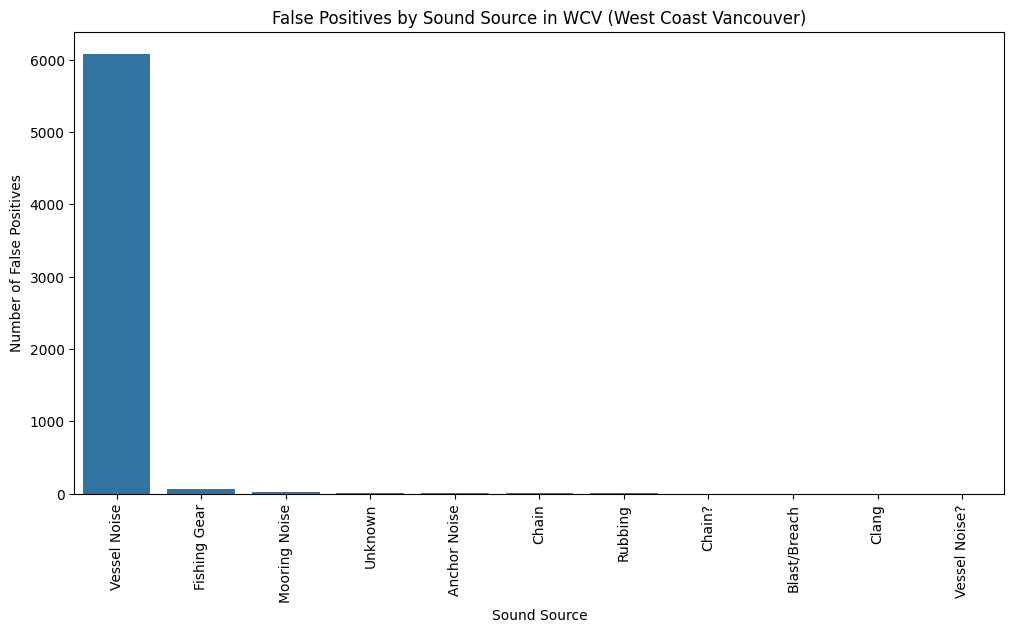

In [119]:
false_positives = df_wcv[df_wcv["detectionType"] == "False Positive"]

fp_species_counts = false_positives["Sound.ID.Species"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fp_species_counts.index, y=fp_species_counts.values)
plt.title("False Positives by Sound Source in WCV (West Coast Vancouver)")
plt.xlabel("Sound Source")
plt.ylabel("Number of False Positives")
plt.xticks(rotation=90)
plt.show()

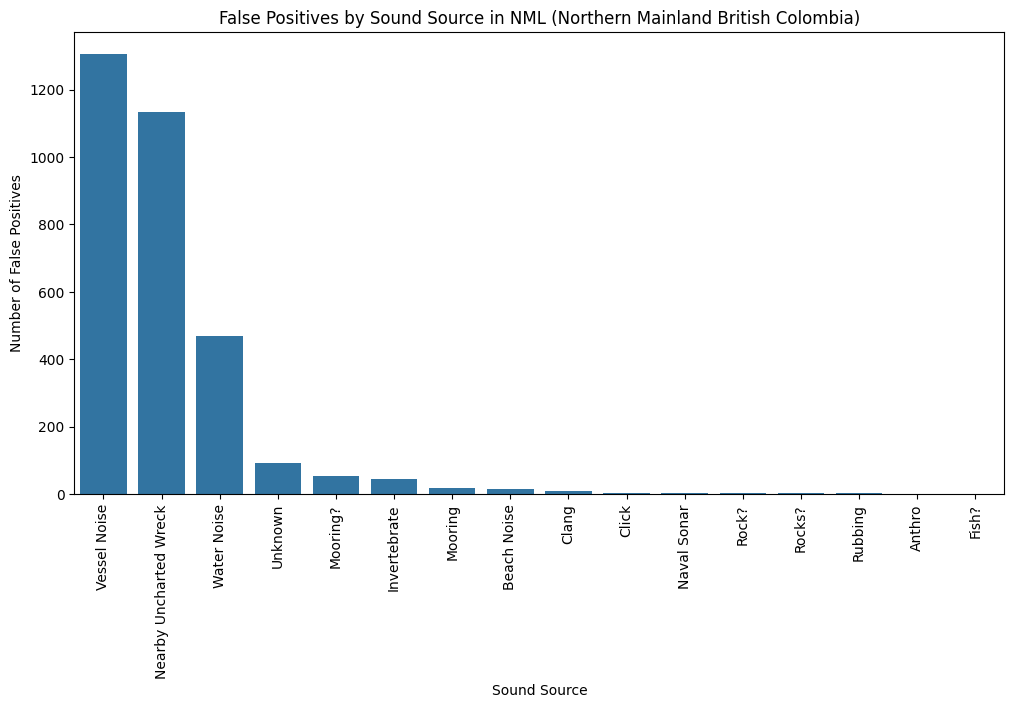

In [121]:
false_positives = df_nml[df_nml["detectionType"] == "False Positive"]

fp_species_counts = false_positives["Sound.ID.Species"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fp_species_counts.index, y=fp_species_counts.values)
plt.title("False Positives by Sound Source in NML (Northern Mainland British Colombia)")
plt.xlabel("Sound Source")
plt.ylabel("Number of False Positives")
plt.xticks(rotation=90)
plt.show()

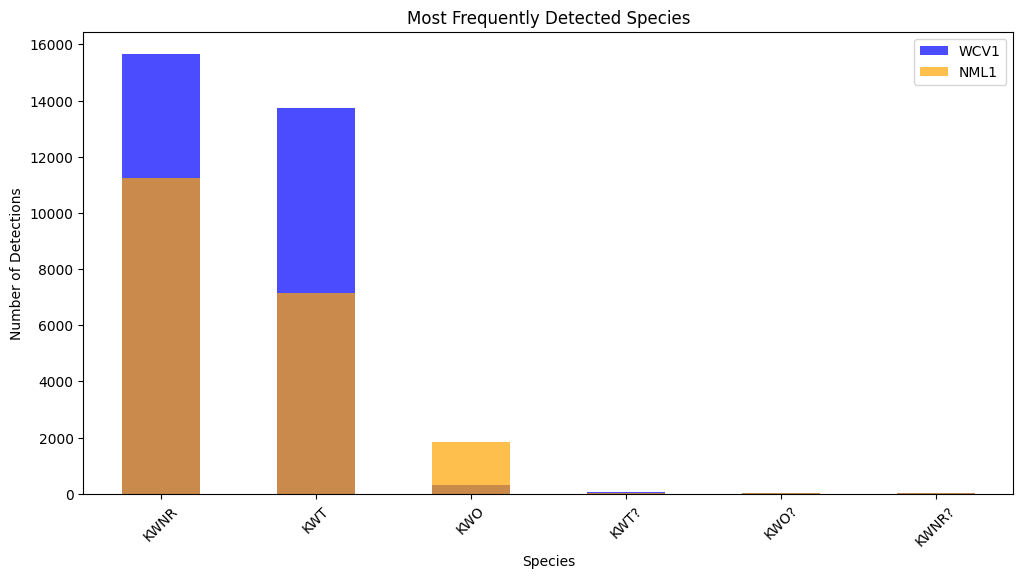

In [123]:
plt.figure(figsize=(12, 6))
df_wcv["KW.Type"].value_counts().head(10).plot(
    kind="bar", color="blue", alpha=0.7, label="WCV1"
)
df_nml["KW.Type"].value_counts().head(10).plot(
    kind="bar", color="orange", alpha=0.7, label="NML1"
)
plt.xlabel("Species")
plt.ylabel("Number of Detections")
plt.title("Most Frequently Detected Species")
plt.xticks(rotation=45)
plt.legend()
plt.show()